In [2]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import cv2

## Read images

In [3]:
dataset_path1 = 'train/'
dataset_path2 = 'test/'

width  = 195
height = 231

In [18]:
#color_img = cv2.imread("datanew/subject01.normal.jpg")
gray_img = cv2.imread("datanew/subject01.normal.jpg", cv2.IMREAD_GRAYSCALE)
print(gray_img)

None


In [19]:
color2_img = cv2.imread("data_set/subject01.normal.jpg")
print(color2_img.shape)

(231, 195, 3)


Train Images:


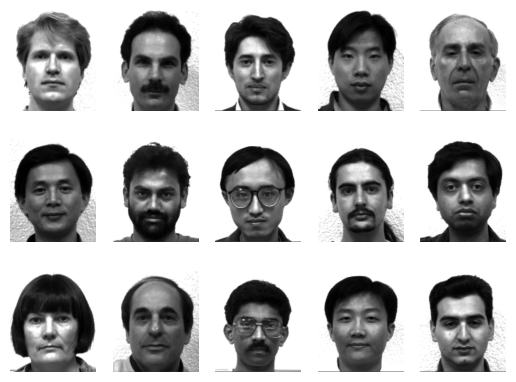

In [6]:
print('Train Images:')
train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject04.normal.jpg', 'subject05.normal.jpg', 'subject06.normal.jpg', 'subject07.normal.jpg', 'subject08.normal.jpg', 'subject09.normal.jpg', 'subject10.normal.jpg','subject11.normal.jpg', 'subject12.normal.jpg', 'subject13.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = cv2.imread(dataset_path1 + train_image_names[i], cv2.IMREAD_GRAYSCALE)
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [20]:
np.array(img, dtype='float64').flatten()

array([  0.46666667,   0.4       ,   0.06666667, ..., -49.33333333,
       -57.8       , -60.93333333])

Test Images:


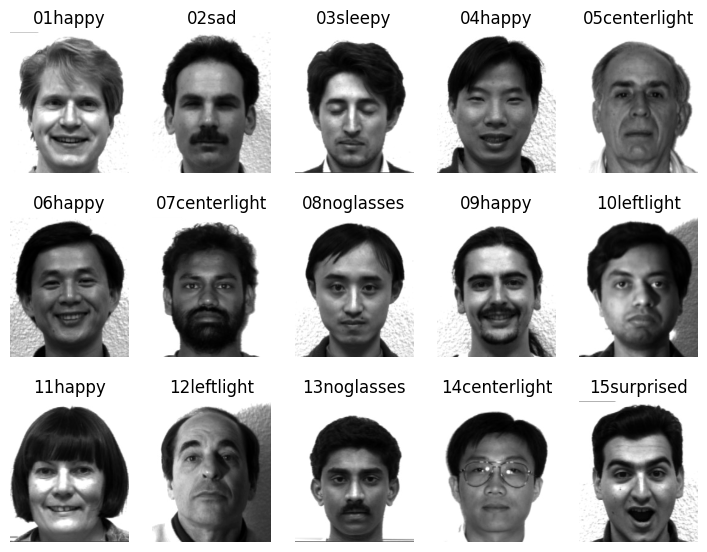

In [7]:
print('Test Images:')
test_image_names = ['subject01.happy.jpg','subject02.sad.jpg','subject03.sleepy.jpg','subject04.happy.jpg','subject05.centerlight.jpg','subject06.happy.jpg','subject07.centerlight.jpg','subject08.noglasses.jpg','subject09.happy.jpg','subject10.leftlight.jpg','subject11.happy.jpg','subject12.leftlight.jpg','subject13.noglasses.jpg','subject14.centerlight.jpg','subject15.surprised.jpg']
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = cv2.imread(dataset_path2 + test_image_names[i], cv2.IMREAD_GRAYSCALE)
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,5,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

## mean face

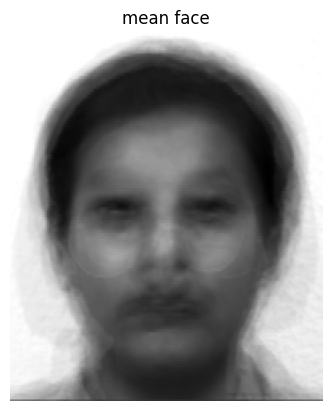

In [8]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.title('mean face')
plt.axis('off')
plt.show()

## Normalized faces

In [9]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

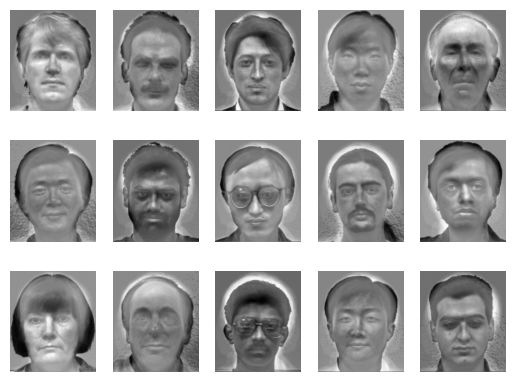

In [10]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(3,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

## cov matrix

In [11]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)

In [12]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
#print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
#print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

In [13]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

## PCA

In [14]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)


Cumulative proportion of variance explained vector: 
[0.20431738 0.34956138 0.484246   0.57784633 0.65921291 0.72580086
 0.77765446 0.82262265 0.86297392 0.90066572 0.92853255 0.95518771
 0.98113848 1.         1.        ]


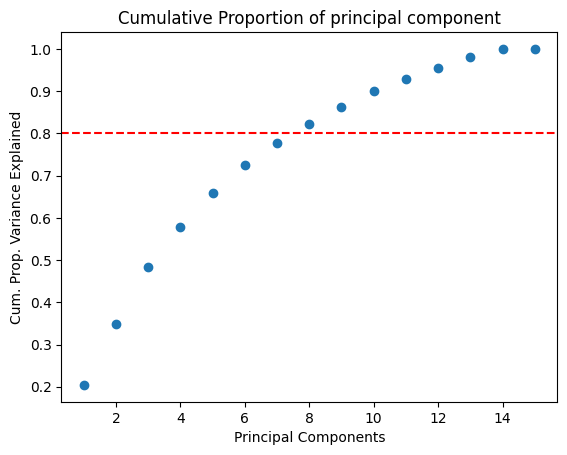

In [23]:
# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cumulative Proportion of principal component')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Explained')

plt.axhline(0.8, color='r', linestyle='--', label='component axe')
plt.scatter(num_comp, var_comp_sum)
plt.show()

In [16]:
reduced_data = np.array(eigvectors_sort[:8]).transpose()
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

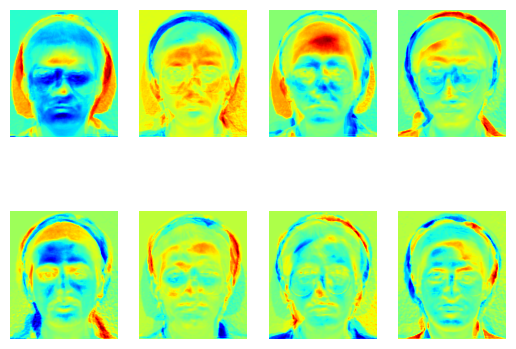

In [22]:
#plot the eigen face
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.axis('off')
    #plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')  
plt.show()

## Finding weights for each traning image

In [161]:
# princinpal components in each training image
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[-4.30470881e+07, -5.94760606e+06,  1.79256856e+07,
         1.76331080e+07, -3.97011385e+07, -7.35700396e+07,
        -6.70531297e+07, -4.24639364e+07],
       [ 2.79692794e+07,  4.05259373e+07, -4.26928491e+06,
         1.23958986e+07,  8.62639288e+06,  1.98360897e+07,
        -3.24023014e+07,  2.64948680e+07],
       [ 6.56047056e+07,  2.00907002e+07, -5.09823491e+07,
         9.09829490e+06, -2.97479257e+07, -3.12187235e+07,
         1.06092688e+07, -6.37703725e+07],
       [ 1.44483168e+07,  5.64932009e+07, -3.45822359e+06,
        -8.38080115e+07,  7.05374449e+07,  3.03971444e+07,
         3.47812827e+06,  1.42730319e+07],
       [ 4.62658952e+06, -1.20701256e+08,  9.01907547e+07,
         2.88120248e+07,  3.53876545e+07, -6.07976117e+06,
        -1.57070831e+07, -2.85608646e+07],
       [-1.08629923e+08,  4.99669398e+07,  7.45623989e+06,
         3.32181364e+07,  1.41025449e+05,  1.31430877e+07,
         2.65696280e+07,  5.50619296e+07],
       [ 1.06260055e+08,  2.071047

In [125]:
train_image_names[5].split('.')[:2]

['subject06', 'normal']

## Recognize test images

In [165]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face = cv2.imread('test/'+img, cv2.IMREAD_GRAYSCALE)
    num_images += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(5,6,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.axis('off')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector) #Projecting the normalized vector onto the eigenspace, to find out the weights:
    # Finding the  𝑚𝑖𝑛|𝑊−𝑊𝑢𝑛𝑘𝑛𝑜𝑤𝑛|
    diff  = w - w_unknown 
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t = 100000000 #thershold
    
    if norms[index] < t:
        plt.subplot(5,6,1+count)
        if img.split('.')[0] == train_image_names[index].split('.')[0]:
            plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
            plt.imshow(imread('train/'+train_image_names[index]), cmap='gray')
            plt.axis('off')
            correct_pred += 1
        else:
            plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
            plt.imshow(imread('train/'+train_image_names[index]), cmap='gray')
            plt.axis('off')
    else:
        plt.subplot(5,6,1+count)
        plt.title('Unknown face!', color='r')
        plt.axis('off')
    count+=1

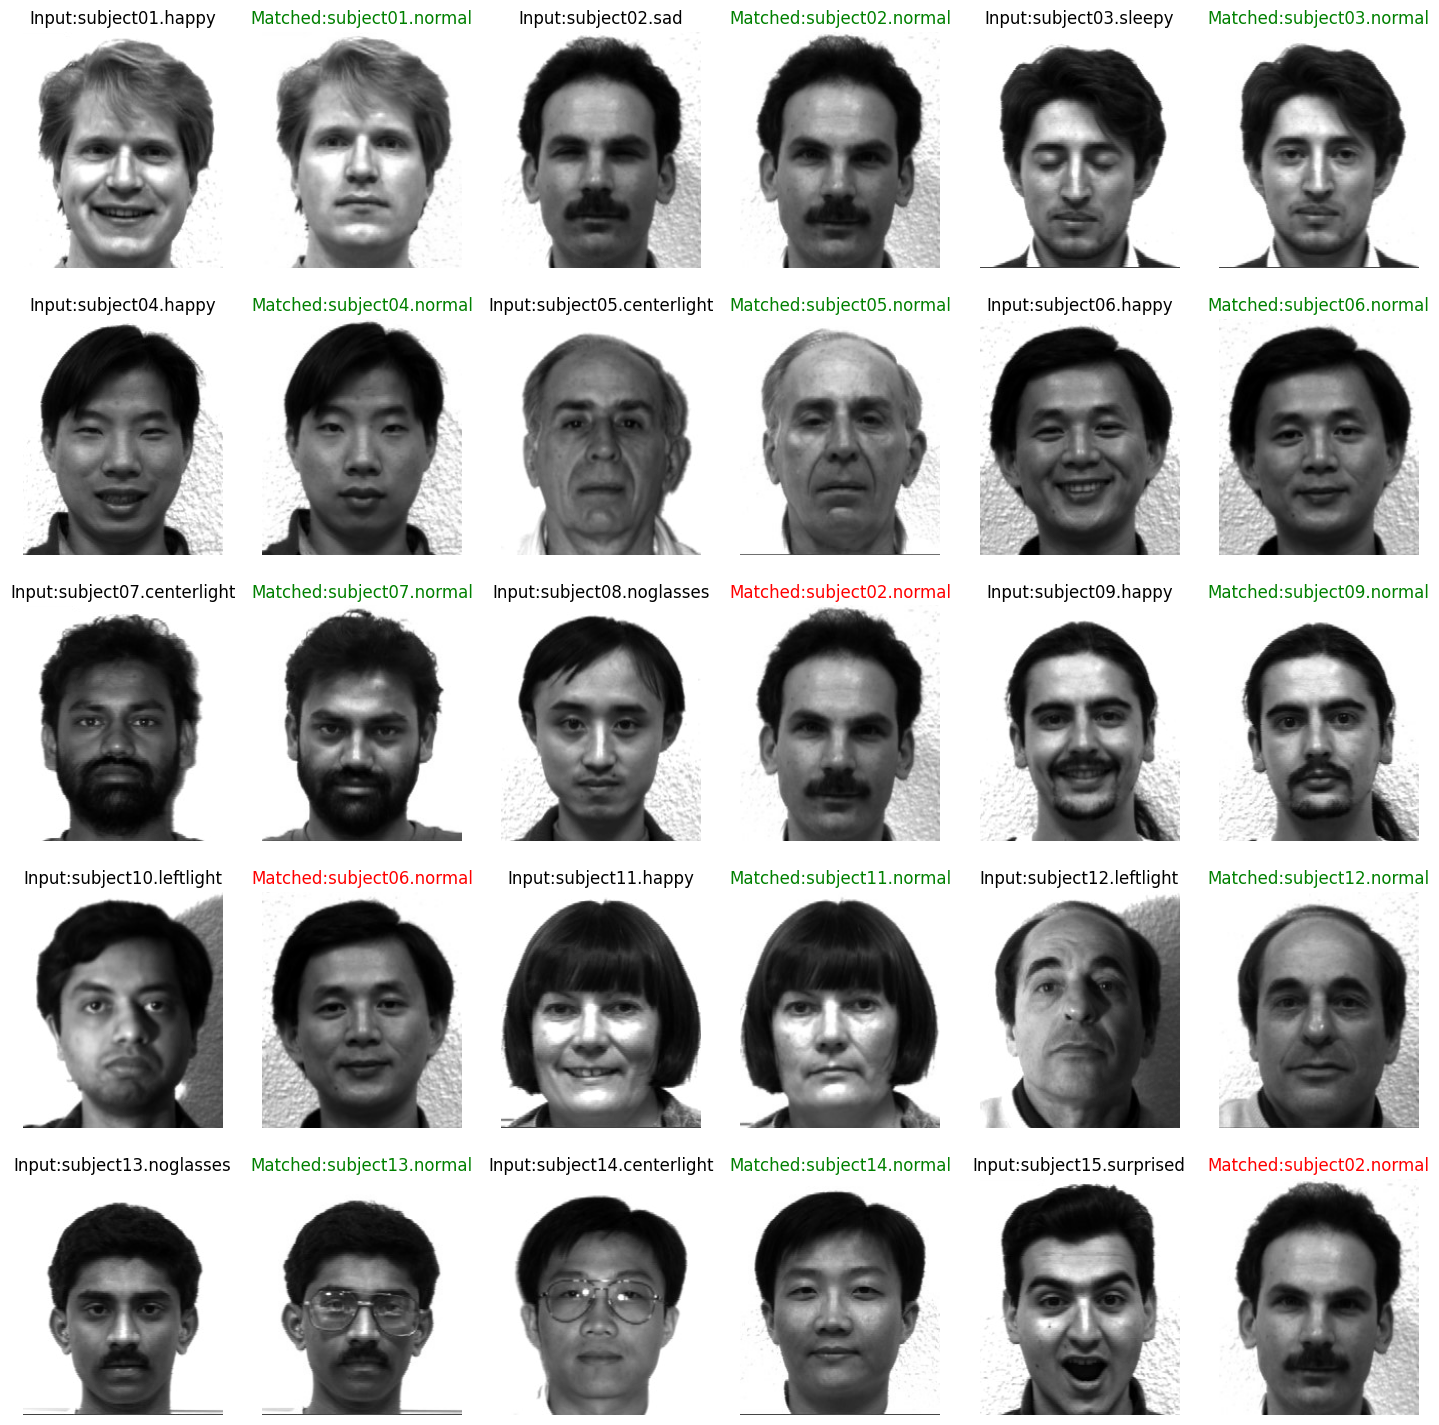

In [166]:
fig = plt.figure(figsize=(18, 18))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

In [164]:
print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

Correct predictions: 12/15 = 80.0%
